# Non-fungible Token (NFT) Auction Game

This is a part of the Crypto Trading Course by IMC and the first time I've looked at NFTs.



## What are NFTs?

NFTs are tokens on the blockchain which are unique cannot be created again (i.e. non-fungible). These tokens on the blockchain can be associated with art through websites such as [opensea.io](https://opensea.io/).

We were looking at the *Bored Ape Yacht Club* (BAYC) which is a collection 10000 NFTs. Apes have 6 characteristics (background colour, fur style, mouth style, eyes style and hat), which are shared e.g. over 500 apes have 'bloodshot' eyes, but no two apes have exactly the same combination of all characteristics. Some NFTs are more rare than others e.g. for BAYC golden fur is very rare. Rare characteristics strongly correlate with the price. 


## How the game works 

We were provided with a subset of the apes (~3300) in a CSV along with their characteristics and were given $300. An auction was then held where the apes would be given a score by rarity. If we met the following rules, our top 6 apes would be added up to give a final score:

- Apes bought must not exceed $300
- Must have one ape of each background colour 
- Must have one ape with solid gold fur

The score assigned to each ape was the sum of the inverse rarities for each trait (where the rarity is the number of instances of a charactersitic / total number of tokens), the that the score increases with the rarity.

To calculate the score for the ape in the photo below:

- Background: Yellow (17.00%)
- Fur: Solid Gold (0.052%)
- Clothes: Black T (4.10%)
- Mouth: Small Grin (2.54%)
- Eyes: Laser Eyes (0.70%)
- Hat: Sea Captain's Hat (5.32%)


1 /0.1700 + 1/ 0.0052 + 1 /0.0410 + 1/ 0.0254 + 1 /0.0070 + 1 /0.0532 ~ 429 

There is also a **wildcard** token which boosts the players final score by 20% but doesn't count as one of the six tokens. 


## What I've considered

- Atleast one token with solid gold fur how many players are there, get it early?
- How should token valuations change with time 
- Come up with way to check the incidence
- Which ones have the largest shift in rarity
- Backgrounds all have roughly the same occurance so this won't be an input into the model 
- How should the value of a background increase if you don't have it 
- Should you ever buy more than 6? 

![Image of Token](https://ipfs.io/ipfs/QmQpxqZ6hPnx8ofapPVgbg9JAh7S9oh3fNYvWwU7okdCU8)

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the tokens table

In [4]:
# lets import the csv and have a look at the columns
df_tokens = pd.read_csv('cleaned_nft_data.csv', index_col=1)

df_tokens.head()

,Unnamed: 0,image_url,Background,Fur,Clothes,Mouth,Eyes,Hat
id,,,,,,,,
4,4,https://ipfs.io/ipfs/QmSg9bPzW9anFYc3wWU5Knvym...,Blue,Golden Brown,Navy Striped Tee,Phoneme L,Closed,Party Hat 2
6,6,https://ipfs.io/ipfs/QmWBgfBhyVmHNhBfEQ7p1P4Mp...,Yellow,Cream,Tweed Suit,Bored,Crazy,S&m Hat
7,7,https://ipfs.io/ipfs/QmRsJLrg27GQ1ZWyrXZFuJFdU...,Gray,Golden Brown,Wool Turtleneck,Bored,Angry,Stuntman Helmet
10,10,https://ipfs.io/ipfs/QmPQdVU1riwzijhCs1Lk6CHmD...,Aquamarine,Dmt,Navy Striped Tee,Bored,Eyepatch,Bayc Hat Red
11,11,https://ipfs.io/ipfs/QmVvdAbabZ2awja88uUhYHFuq...,Gray,Dark Brown,Smoking Jacket,Bored Unshaven Cigarette,Bloodshot,Laurel Wreath


### Scoring by token_id 

First of all it will be useful to create a function to score an ape off the `token_id` only, this will save lots of time which will be useful in the auction (as opposed to entering in all the traits manually, which is also prone to error). 

First of all we need to create dictionaries for each charateristic with style as the key and the rarity as the value.

In [12]:
# we need the ' ' to give as a fraction instead of # of occurances 
background = dict(df_tokens.Background.value_counts(' '))
fur = dict(df_tokens.Fur.value_counts(' '))
clothes = dict(df_tokens.Clothes.value_counts(' '))
mouth = dict(df_tokens.Mouth.value_counts(' '))
eyes = dict(df_tokens.Eyes.value_counts(' '))
hat = dict(df_tokens.Hat.value_counts(' '))

In [13]:
# simple function carries out the scoring for a given token_id
# if possible it would be nice to have the scores as a new column in the df to reduce compute 
def score_token(token_id):
    
    v = df_tokens.loc[token_id]
    
    return 1/ background[v.Background] + 1 / fur[v.Fur] + 1 / clothes[v.Clothes] + 1 / mouth[v.Mouth] + 1 / eyes[v.Eyes] + 1 / hat[v.Hat]

In [14]:
# add on the extra column with all the scores, almost certaintly a nicer way of doing this
x = []

for token_id in df_tokens.index:
    x.append(score_token(token_id))
    
df_tokens['Score'] = x

df_tokens.head()

,Unnamed: 0,image_url,Background,Fur,Clothes,Mouth,Eyes,Hat,Buyer,Price,Auction #,Score
id,,,,,,,,,,,,
4,4,https://ipfs.io/ipfs/QmSg9bPzW9anFYc3wWU5Knvym...,Blue,Golden Brown,Navy Striped Tee,Phoneme L,Closed,Party Hat 2,0.0,0.0,0.0,178.010896
6,6,https://ipfs.io/ipfs/QmWBgfBhyVmHNhBfEQ7p1P4Mp...,Yellow,Cream,Tweed Suit,Bored,Crazy,S&m Hat,0.0,0.0,0.0,144.050040
7,7,https://ipfs.io/ipfs/QmRsJLrg27GQ1ZWyrXZFuJFdU...,Gray,Golden Brown,Wool Turtleneck,Bored,Angry,Stuntman Helmet,0.0,0.0,0.0,123.616556
10,10,https://ipfs.io/ipfs/QmPQdVU1riwzijhCs1Lk6CHmD...,Aquamarine,Dmt,Navy Striped Tee,Bored,Eyepatch,Bayc Hat Red,0.0,0.0,0.0,202.886295
11,11,https://ipfs.io/ipfs/QmVvdAbabZ2awja88uUhYHFuq...,Gray,Dark Brown,Smoking Jacket,Bored Unshaven Cigarette,Bloodshot,Laurel Wreath,0.0,0.0,0.0,199.172749


### Tokens auction data

We want to have data about the auction number

In [15]:
# add in the new columns 
zeros = np.zeros(len(df_tokens))
df_tokens['Buyer'] = zeros
df_tokens['Price'] = zeros 
df_tokens['Auction #'] = zeros

df_tokens

,Unnamed: 0,image_url,Background,Fur,Clothes,Mouth,Eyes,Hat,Buyer,Price,Auction #,Score
id,,,,,,,,,,,,
4,4,https://ipfs.io/ipfs/QmSg9bPzW9anFYc3wWU5Knvym...,Blue,Golden Brown,Navy Striped Tee,Phoneme L,Closed,Party Hat 2,0.0,0.0,0.0,178.010896
6,6,https://ipfs.io/ipfs/QmWBgfBhyVmHNhBfEQ7p1P4Mp...,Yellow,Cream,Tweed Suit,Bored,Crazy,S&m Hat,0.0,0.0,0.0,144.050040
7,7,https://ipfs.io/ipfs/QmRsJLrg27GQ1ZWyrXZFuJFdU...,Gray,Golden Brown,Wool Turtleneck,Bored,Angry,Stuntman Helmet,0.0,0.0,0.0,123.616556
10,10,https://ipfs.io/ipfs/QmPQdVU1riwzijhCs1Lk6CHmD...,Aquamarine,Dmt,Navy Striped Tee,Bored,Eyepatch,Bayc Hat Red,0.0,0.0,0.0,202.886295
11,11,https://ipfs.io/ipfs/QmVvdAbabZ2awja88uUhYHFuq...,Gray,Dark Brown,Smoking Jacket,Bored Unshaven Cigarette,Bloodshot,Laurel Wreath,0.0,0.0,0.0,199.172749
...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9982,https://ipfs.io/ipfs/QmdkD8KyfLjXYayoAxLwmNHGi...,Yellow,Golden Brown,Sleeveless T,Bored Unshaven,Sleepy,Horns,0.0,0.0,0.0,103.637586
9988,9988,https://ipfs.io/ipfs/QmU7fZA7zVbSytGLWpMXDnCxF...,Yellow,Black,Hip Hop,Bored,Sad,Beanie,0.0,0.0,0.0,110.097533
9991,9991,https://ipfs.io/ipfs/QmdtSF6sZTxqe1GKKrdKMyZPz...,Blue,Golden Brown,Vietnam Jacket,Bored,Coins,Laurel Wreath,0.0,0.0,0.0,195.622678


## What does our data look like?

- How are scores dsitributed
- What difference will this make for decision making
- etc.

In [16]:
# backgrounds are roughly same prob so can leave this aspect out of model 
background

{'Orange': 0.17467115325787702,
 'Blue': 0.17161211379626798,
 'Yellow': 0.17008259406546344,
 'Aquamarine': 0.16885897828081983,
 'Gray': 0.15784643621902722,
 'Purple': 0.1569287243805445}

In [17]:
# rarity * total tokens / only 17 solid gold means some people probably are not going to be able to buy
fur['Solid Gold'] * 3269

17.0

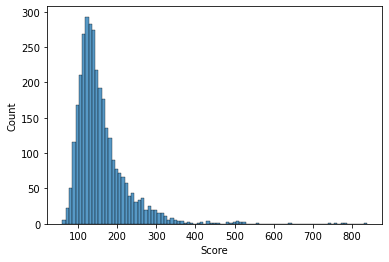

In [18]:
# we have something that looks some what Poissonian... with a few big outliers - how will they affect things
sns.histplot(df_tokens['Score']);

In [19]:
# get some useful information about the distribution of scores
df_tokens['Score'].describe()

count    3269.000000
mean      159.000000
std        65.705155
min        60.604009
25%       118.504273
50%       142.296729
75%       180.613959
max       837.286214
Name: Score, dtype: float64

## What does the output look like 

We want to be able to put in a single function the data from the auction of each token `(token_id, player_id, price)` and allow this to then update important data points that might be useful. 

Pieces of data that may be useful are:

- My average price per point
- The average price per point for everyone both long standing and n rolling ave.
- The average price for gold fur
- Total money left



In [21]:
def init_df(names: list) -> pd.DataFrame:
    return pd.DataFrame({'Players': names, 'Money': 300, 'Gold Fur': False, 'Backgrounds to get': 'OBYAGP', 'Score': 0, 'Price per point': 0}) 


In [23]:
def update_player_table(df_names, df_tokens, name, token_id, price):
    
    # surely there is a better way to access and change a single row
    # maybe add in feature to say which tokens they own
    # put in auctions table to add in token_id price and who to
    
    # find the index of the player
    player_idx = df_names[df_names['Players'] == name].index.values[0]
    
    # update the score
    df_names.loc[player_idx, 'Score'] += df_tokens.loc[token_id, 'Score']
    
    # update whether they have 'Solid Gold' fur
    if df_tokens.loc[token_id, 'Fur'] == 'Solid Gold':
        df_names.loc[player_idx, 'Gold Fur'] = True
    
    # update backgrounds left to get 
    df_names.loc[player_idx, 'Backgrounds to get'] = df_names.loc[player_idx, 'Backgrounds to get'].replace(df_tokens.loc[token_id, 'Background'][0], '')
    
    # update the money 
    df_names.loc[player_idx, 'Money'] = df_names.loc[0].Money - price
    
    # update the price paid per point 
    df_names.loc[player_idx, 'Price per point'] = (300 - df_names.loc[player_idx, 'Money']) / df_names.loc[player_idx, 'Score']
    


In [33]:
def update_tokens_table(df_tokens, player_idx, token_id, price):
    
    # add the buyer 
    df_tokens.loc[4,'Buyer'] = player_idx
    
    # add the price 
    df_tokens.loc[4,'Price'] = price
    
    # increment the auction number 
    df_tokens.loc[4,'Auction #'] = df_tokens['Auction #'].max()

In [58]:
def provide_visualisations(player_idx):
    '''
    Provide visualisations on:
    - average price per point and mine
    - rolling 5 auction price per point and mine
    - way to pot this data for analysis after
    - how many gold fur remaining and their id
    '''
    
    # number of gold fur remaining and their id 
    gold_fur = df_tokens[df_tokens['Fur'] == 'Solid Gold']
    
    print(f'Gold fur left {len(gold_fur)} w/ ids: {gold_fur.index.values}')
    
    # n auction rolling score 
    # ave. score tot
    # my ave. score tot
    
    
    print('Average price per point: ' + str(np.average(df_names[df_names['Price per point'] > 0]['Price per point'])))
    print('My average price per point: ' + str(np.average(df_names.loc[player_idx, 'Price per point'])))
    
    # need some kind of auction table to get the last average prices df.concat OK as table is so small
    
provide_visualisations(1)

Gold fur left 17 w/ ids: [ 793  811 1837 2089 2646 3072 3105 3439 3749 3863 4400 4580 5383 6473
 8650 8824 8861]


NameError: name 'df_names' is not defined

## To-do 

- Come up with way of updating the cols in the table in `update_df` function 
- Find way to attach that to a button 
- Add in a reverse previous change button 
- Create `display_stats` this may get broken down into more steps anyway e.g `price_analysis`

In [115]:
names = ['Harry', 'Boris', 'Fran']

#df_names = init_df(names)

update_player_table(df_names, df_tokens, 'Fran', 4, 25)

df_names

,Players,Money,Gold Fur,Backgrounds to get,Score,Price per point
0,Harry,300,False,OBYAGP,0.000000,0.000000
1,Boris,177,True,OBAGP,296.122399,0.415369
2,Fran,275,False,OYAGP,178.010896,0.140441


In [116]:
#find the average price per point

np.average(df_names[df_names['Price per point'] > 0]['Price per point'])

0.2779048110261782

In [135]:
pd.DataFrame(columns = ['a', 'b', 'c'])

,a,b,c


In [138]:
df_auction = init_auction_df()

df_auction

,token_id,price,score,price per point


In [139]:
df_auction.iloc[0] = [4,99,50, 50/99]

IndexError: iloc cannot enlarge its target object

# What does the ideal work flow look like?

- Have widgets that allow for the input of data via buttons with option to reverse the previous auction 
- Create a token table which allows us to see the score and details - player_idx, price
- Also have some way of seeing what the aucion number was a then finding the average and rolling average for me and other
- Find the number of gold fur that have empty player_idx col  
- Way of finding the values in the update_player table more dynamically i.e. using toke_id table more 

In [36]:
df_tokens['Score'].max()

837.2862143224065

In [51]:
df_tokens[df_tokens['Fur'] == 'Solid Gold']

,Unnamed: 0,image_url,Background,Fur,Clothes,Mouth,Eyes,Hat,Buyer,Price,Auction #,Score
id,,,,,,,,,,,,
793,793,https://ipfs.io/ipfs/QmVfmo74Fd5oc8gc2bcru9dEn...,Yellow,Solid Gold,Navy Striped Tee,Bored Pipe,Sleepy,Stuntman Helmet,0.0,0.0,0.0,350.086136
811,811,https://ipfs.io/ipfs/QmXbta7yCR56uDPXm4QLX7M3j...,Yellow,Solid Gold,Biker Vest,Rage,Sleepy,Seaman's Hat,0.0,0.0,0.0,296.122399
1837,1837,https://ipfs.io/ipfs/QmXRwKKQALoTRnAbXrQGKNsgd...,Orange,Solid Gold,Wool Turtleneck,Bored Unshaven,Crazy,Short Mohawk,0.0,0.0,0.0,294.357479
2089,2089,https://ipfs.io/ipfs/QmUJSagpJUbXXUZw3QRgMFCKT...,Purple,Solid Gold,Puffy Vest,Bored,Hypnotized,Halo,0.0,0.0,0.0,300.538064
2646,2646,https://ipfs.io/ipfs/QmPASLzG1Jq3fAeDcPQSyGeAr...,Gray,Solid Gold,Toga,Bored Unshaven Bubblegum,Sad,Bayc Flipped Brim,0.0,0.0,0.0,444.565188
3072,3072,https://ipfs.io/ipfs/Qmd7GKKMS7NgJrWZZxRLcdyrS...,Aquamarine,Solid Gold,Striped Tee,Bored,Bored,Beanie,0.0,0.0,0.0,242.202932
3105,3105,https://ipfs.io/ipfs/QmXZoqMXkvtohLjv19F2FKKcR...,Yellow,Solid Gold,Bandolier,Bored,Closed,Laurel Wreath,0.0,0.0,0.0,383.203782
3439,3439,https://ipfs.io/ipfs/QmW69gmF1hA2JocvcePcf2qAJ...,Aquamarine,Solid Gold,Bayc T Black,Grin,Zombie,Fez,0.0,0.0,0.0,305.059409
3749,3749,https://ipfs.io/ipfs/QmQpxqZ6hPnx8ofapPVgbg9JA...,Yellow,Solid Gold,Black T,Small Grin,Laser Eyes,Sea Captain's Hat,0.0,0.0,0.0,428.850265
